In [6]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.plotting as tpplt
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

import h5py as h5

# Setup figure save path
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/DailyLog/20200513/


In [33]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [7]:
# Set up birds and block_paths
birds = ['B1083', 'B1056', 'B1235', 'B1075']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

# Binning Parameters
windt = 10.0                      # milliseconds
dtovr = 0                 # milliseconds
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'SignalNoiseCorr'        # BootStrap Populations
bdfs = {}                         # Dictionary to store bdf

# Betti Parameters
analysis_id = 'BC'                # Generic lable
nperms = None                     # No permutation for each trial
ncellsperm = 33                   # Subsample 33 neurons from the population
dims = [0, 1, 2, 3]               # We want first four betti numbers
thresh = 13.0                     # Activation threshold
twin = np.linspace(0, 6000, 1000) # milliseconds

In [8]:
# Loop through each bird in our list and bin the data
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=cluster_group, dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf

Data Not already binned
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-0_seg-0-0-SignalNoiseCorr/20200513T173138Z-10.0-0.binned
Data Not already binned
Nreps = 20
skip = 312
dur = 206722.0
nwins = 663
Nreps = 20
skip = 312
dur = 206723.0
nwins = 663
Nreps = 20
skip = 312
dur = 206719.0
nwins = 663
Nreps = 20
skip = 312
dur = 206719.0
nwins = 663
Nreps = 20
skip = 312
dur = 206722.0
nwins = 663
Nreps = 20
skip = 312
dur = 206719.0
nwins = 663
Nreps = 20
skip = 312
dur = 206718.0
nwins = 663
Nreps = 20
skip = 312
dur = 206719.0
nwins = 663
Nreps = 20
skip = 312
dur = 206719.0
nwins = 663
Nrep

In [9]:
# Choose which bird we want to plot and pull paths to data and binned data
bird = 'B1083'
bdf = bdfs[bird]
block_path = bps[bird]


In [53]:
# noise correlations

def get_firing_rates(pop_tens, cell):
    
    fr = np.sum(pop_tens[cell, :, :], axis=0) * (windt/1000.) / 6. 
    return np.squeeze(fr)

def get_noise_corr_points(pop_tens, cell1, cell2):
    
    fr1 = get_firing_rates(pop_tens, cell1)
    fr2 = get_firing_rates(pop_tens, cell2)
    pair_points = np.vstack((fr1, fr2))
    return pair_points

def get_stimulus_avg_frs(pop_tens):
    # returns an ncell length vector of average firing rates over all trials
    fr = np.sum(pop_tens, axis=1) * (windt/1000.) / 6.
    fr_avg = np.mean(fr, axis=1) #average firing rate over trials
    return np.squeeze(fr_avg)

In [25]:
noise_correlation_points = {}

with h5.File(bdf, 'r') as f:
    
    for stim in f.keys():
        pop_tens = np.array(f[stim]['pop_tens'])
        stim_points = np.empty(shape=(2,0))
        for n1 in range():
            # sum firing rates over time
            fr1 = get_firing_rates(pop_tens, n1)
            for n2 in range(n1+1, 101):
                fr2 = get_firing_rates(pop_tens, n2)
                pair_points = np.vstack((fr1, fr2))
                stim_points = np.hstack((stim_points, pair_points))
        noise_correlation_points[stim] = stim_points
                

In [54]:
# stimulus correlations

with h5.File(bdf, 'r') as f:
    stim_avg_frs = np.empty(shape=[0, 101])
    for stim in f.keys():
        pop_tens = np.array(f[stim]['pop_tens'])
        stim_frs = get_stimulus_avg_frs(pop_tens)
        stim_avg_frs = np.vstack((stim_avg_frs, stim_frs))

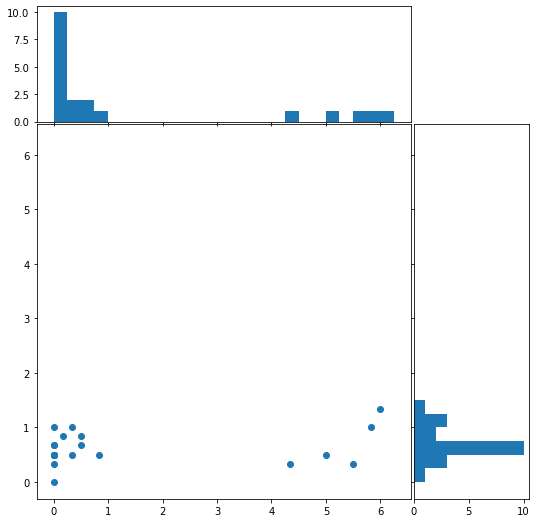

In [59]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
test = get_noise_corr_points(pop_tens, 23, 26)
x = test[0, :]
y = test[1, :]

# test_stim = 'J_40k'
# x = noise_correlation_points[test_stim][0, :]
# y = noise_correlation_points[test_stim][1, :]

scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

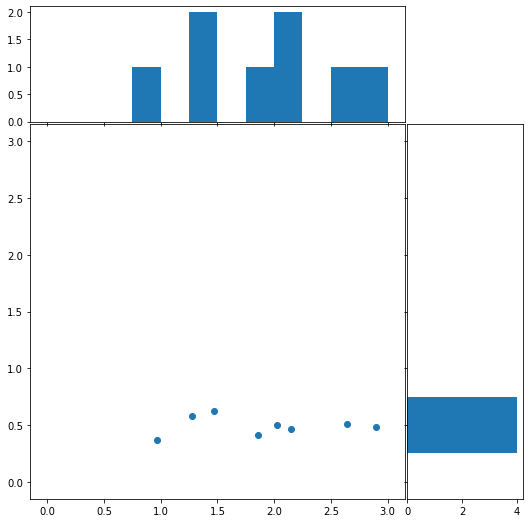

In [64]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

n1 = 23
n2 = 26
x = stim_avg_frs[:, n1]
y = stim_avg_frs[:, n2]

scatter_hist(x, y, ax, ax_histx, ax_histy)

# for n1 in range(23, 30):
#     for n2 in range(n1+1, 30):
#         x = stim_avg_frs[:, n1]
#         y = stim_avg_frs[:, n2]
#         scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

In [40]:
get_firing_rates(pop_tens, 23)

array([0.33333333, 0.        , 0.16666667, 0.33333333, 0.83333333,
       5.83333333, 4.33333333, 5.        , 5.5       , 6.        ,
       0.5       , 0.5       , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [41]:
test[0, :]

array([0.33333333, 0.        , 0.16666667, 0.33333333, 0.83333333,
       5.83333333, 4.33333333, 5.        , 5.5       , 6.        ,
       0.5       , 0.5       , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [48]:
sum(pop_tens[23, :, 5] / 100) / 6

5.833333333333333